In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.linear_model import LogisticRegression

#!pip install ProfileReport
# from ydata_profiling import ProfileReport

In [2]:
# !pip install ProfileReport

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [4]:
df = df.iloc[:,1:]

In [5]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [7]:
# отбор всех сторок с пропущенными значениям в любом месте колонки
df[df.isna().any(axis=1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [8]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
print(df.duplicated().sum())


35


    В данном отчете мы можем посмотреть как ведут себя наши данные. По ним в дальнейшем мы будем делать наши трансформации связанные с данными в каждой колонке, чтобы обучение модели было близко к идеальному

In [10]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1980,150000.0,2,1,1,38,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4585,150000.0,2,1,1,31,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6022,210000.0,2,1,2,39,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6466,210000.0,2,2,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7319,500000.0,1,1,1,43,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8320,360000.0,1,2,1,41,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10250,50000.0,1,2,2,26,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13106,360000.0,2,1,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14294,20000.0,1,2,2,24,2,2,4,4,4,...,1650.0,1650.0,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15458,160000.0,1,2,2,28,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


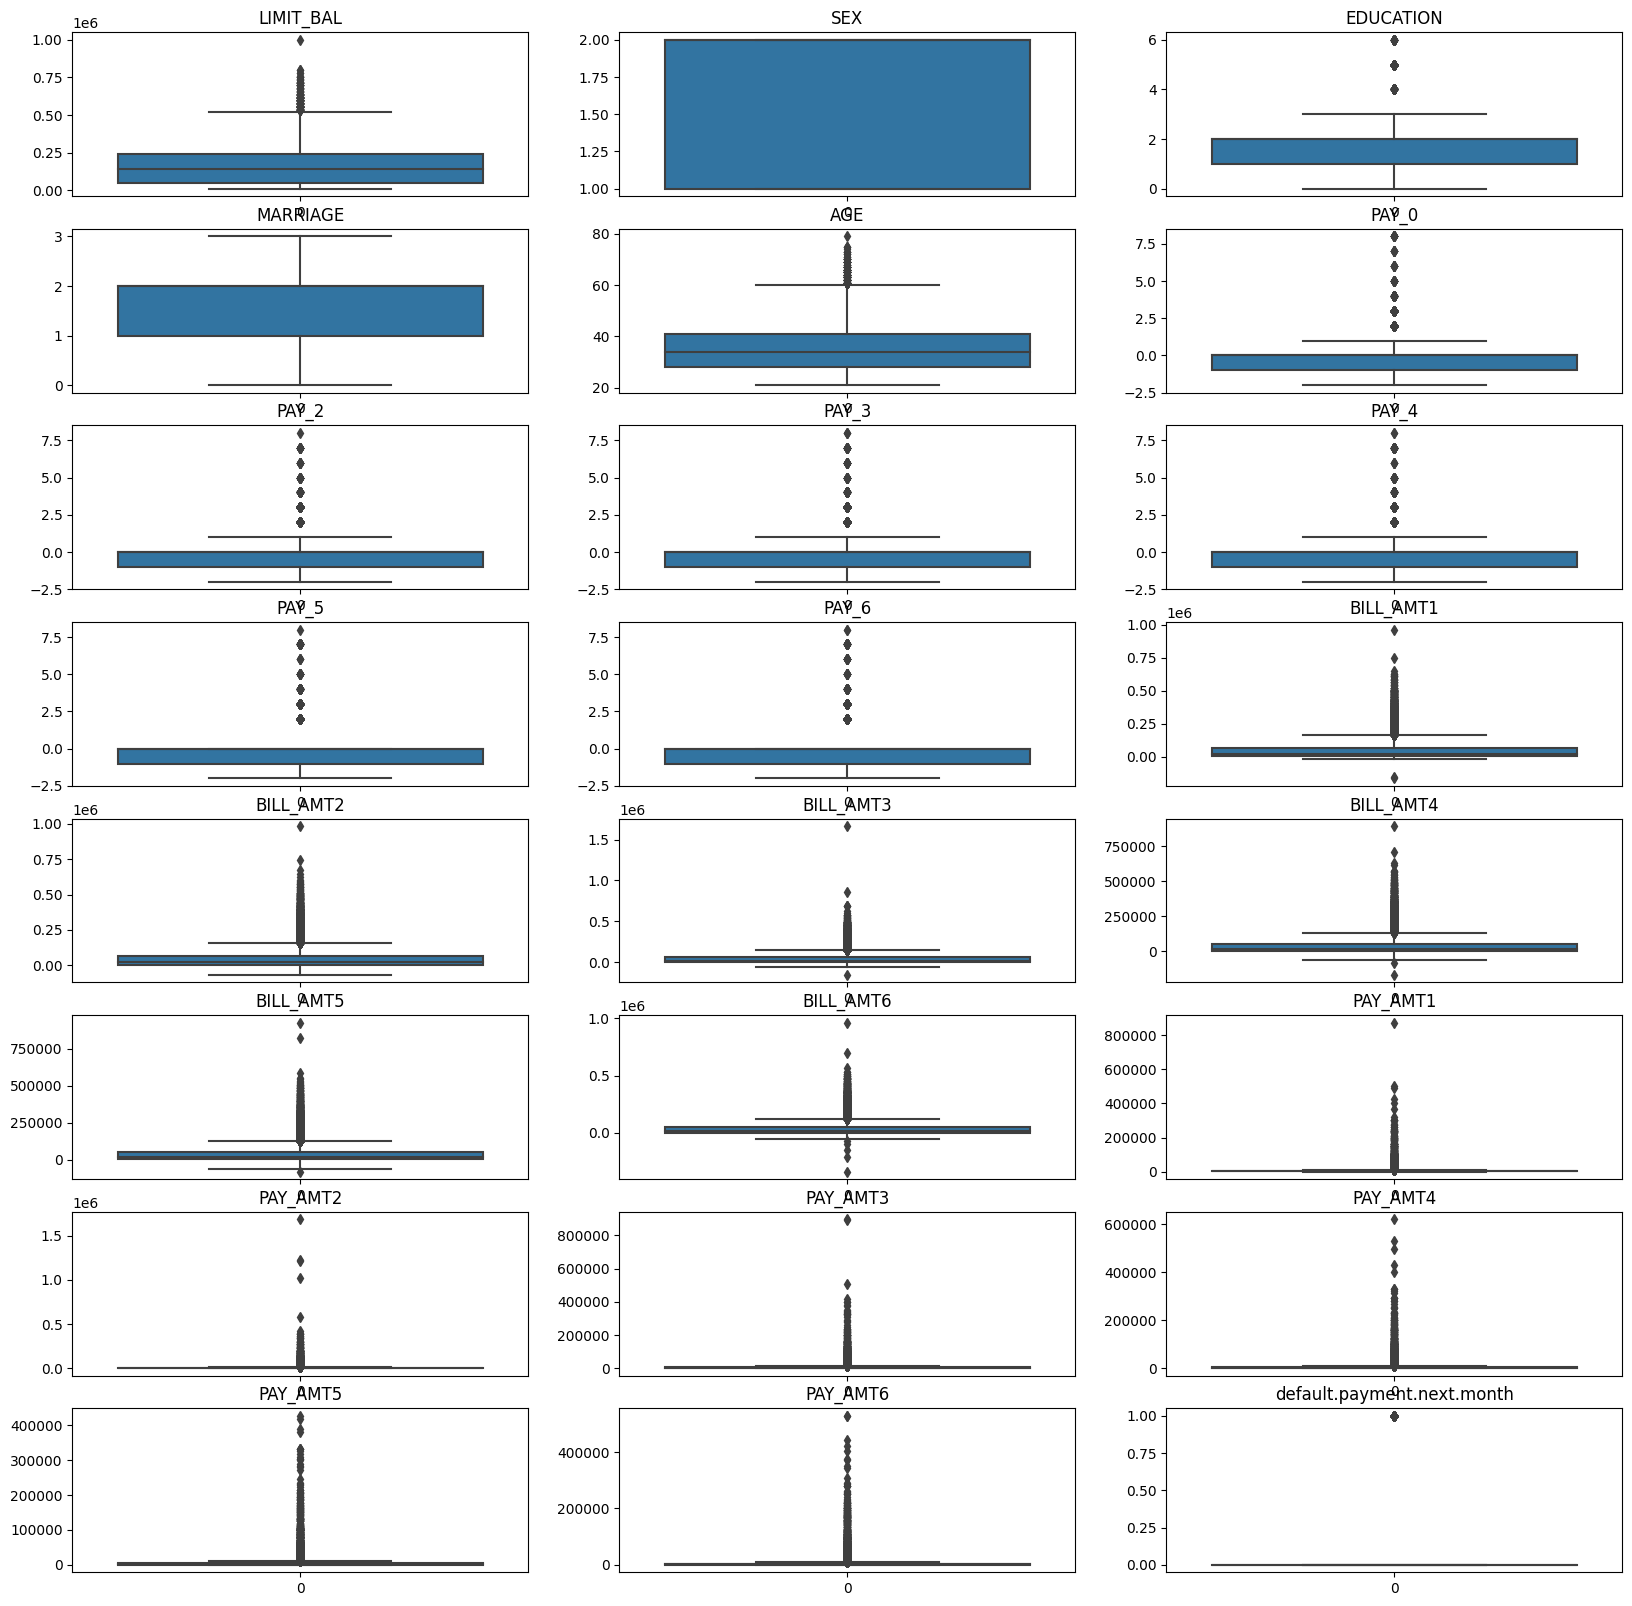

In [11]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(20,20))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

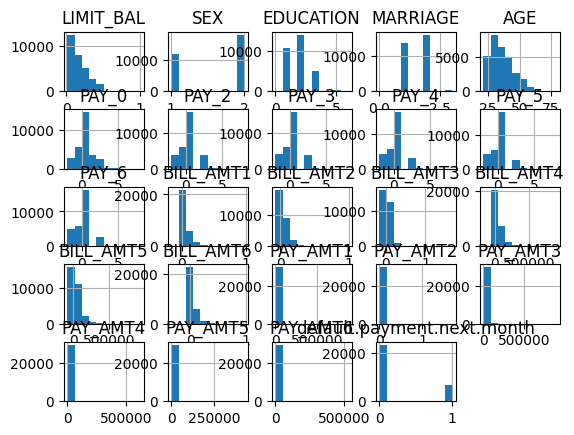

In [12]:
df.hist();

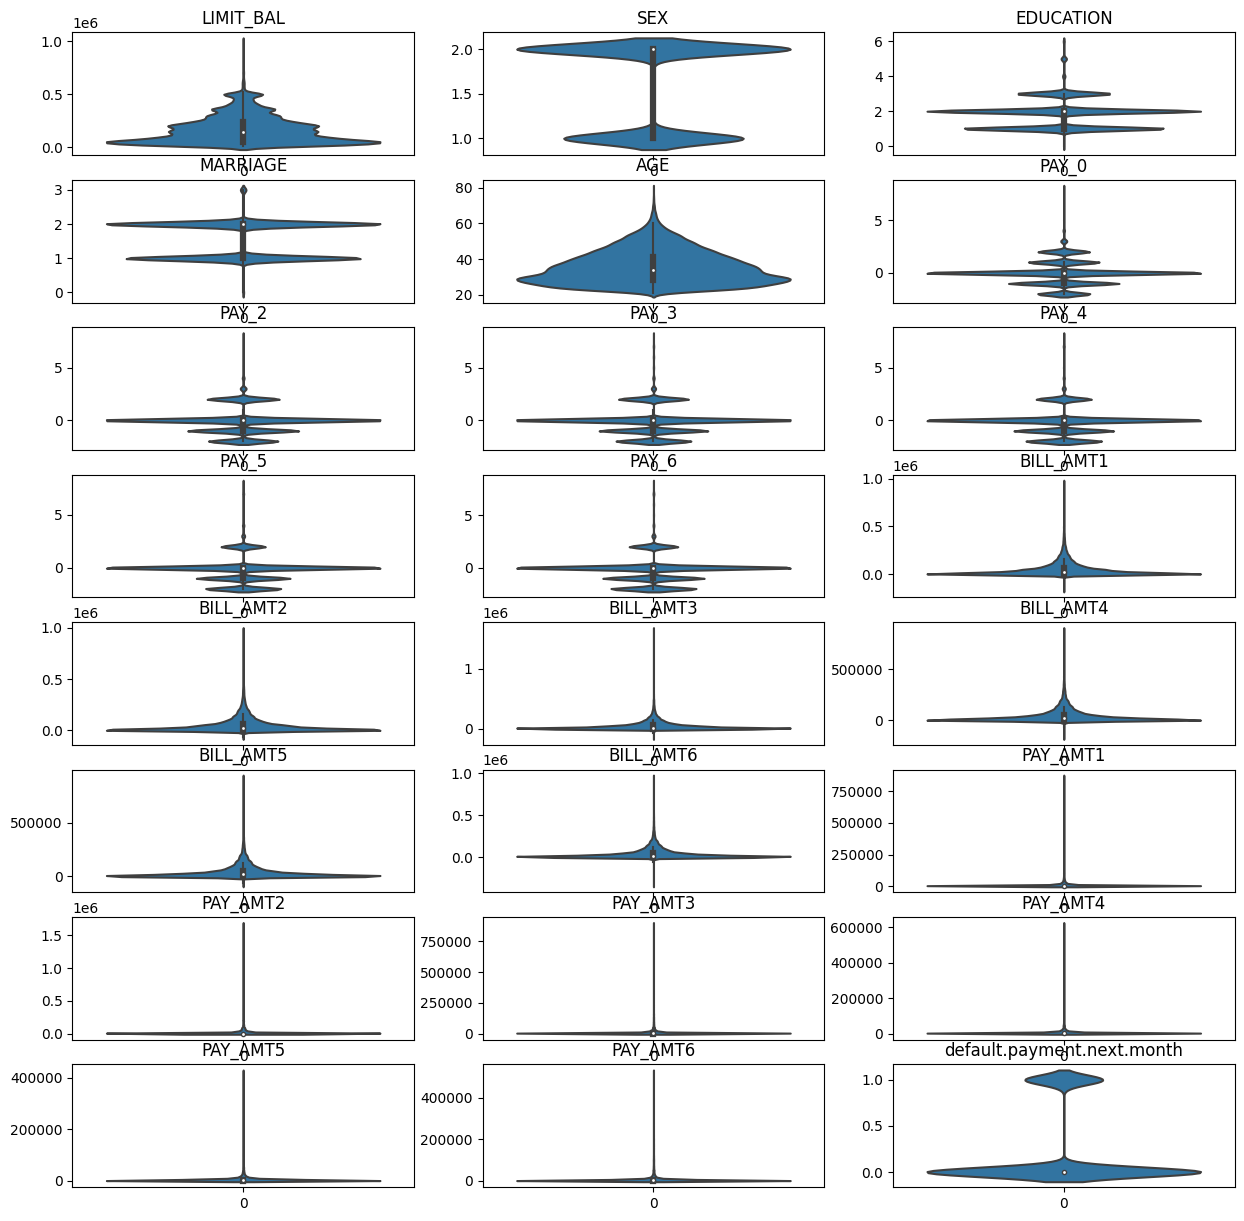

In [13]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

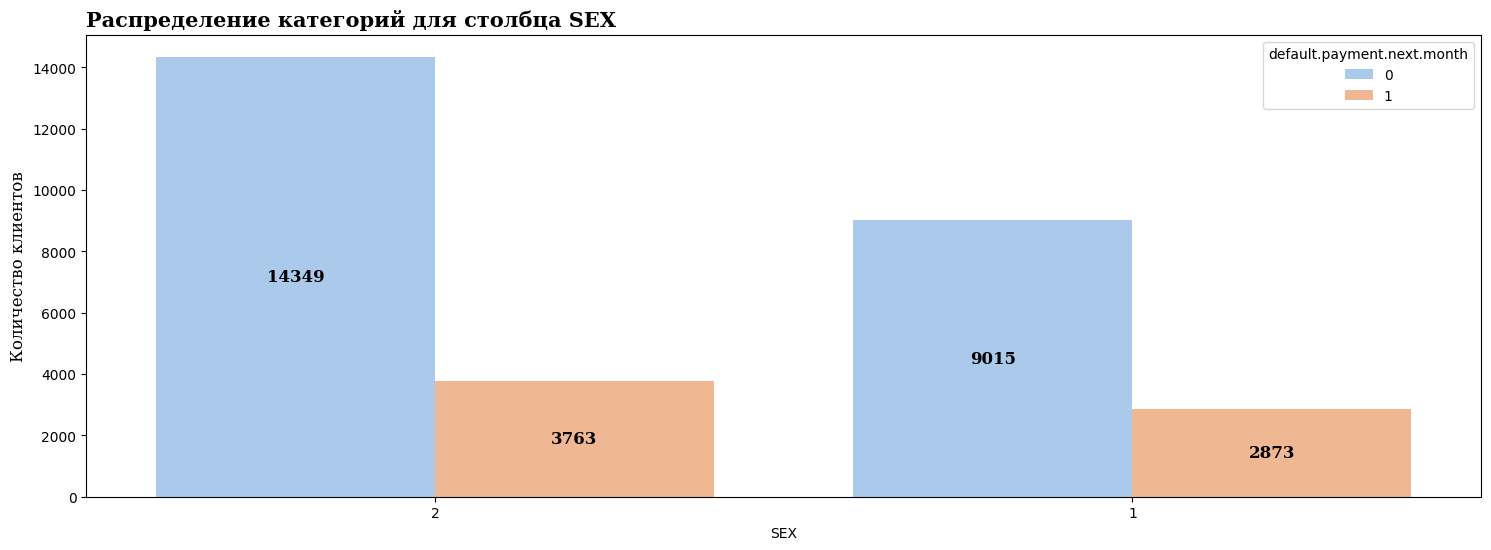

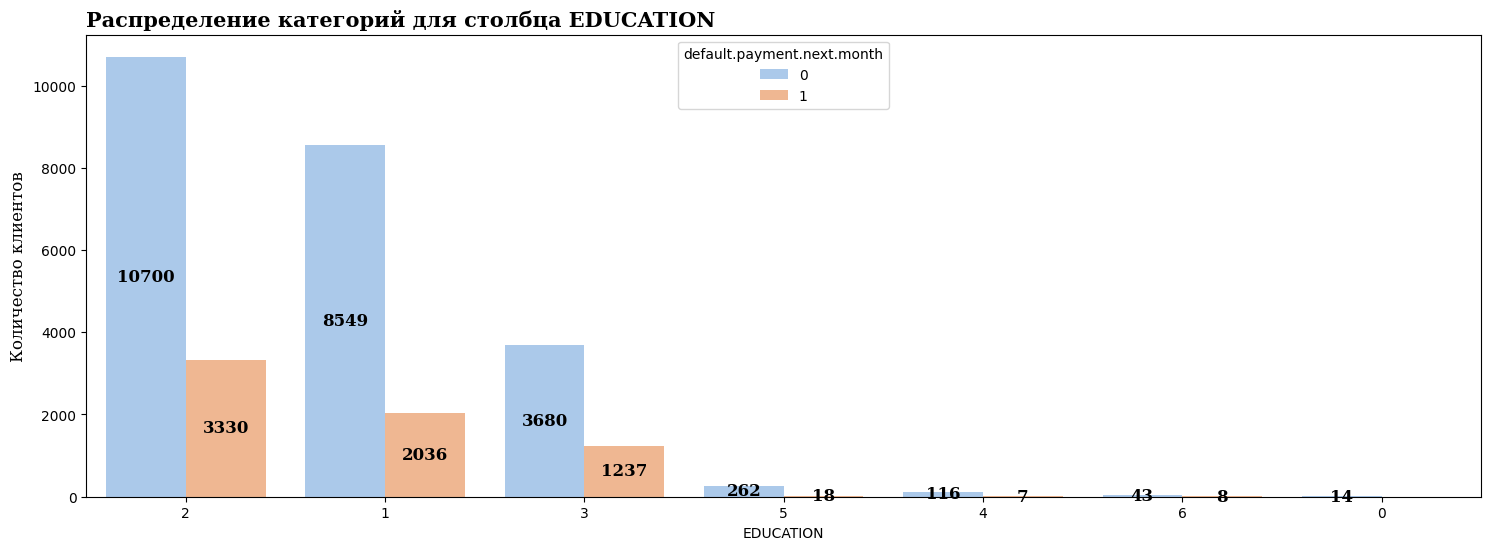

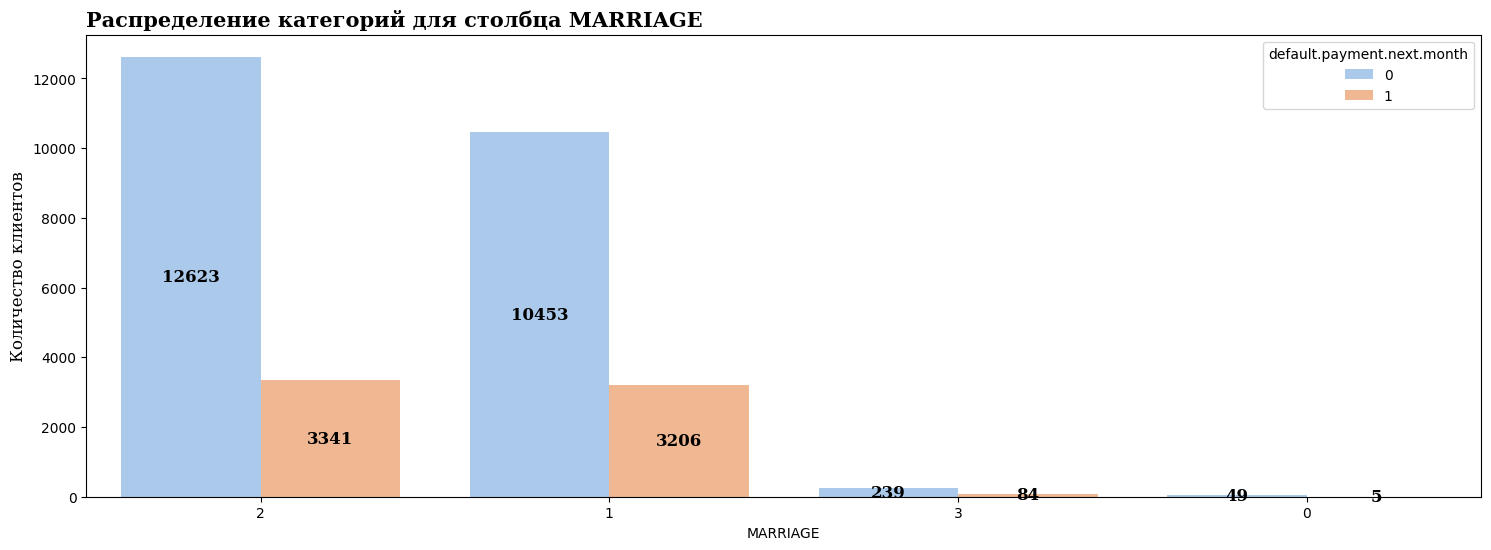

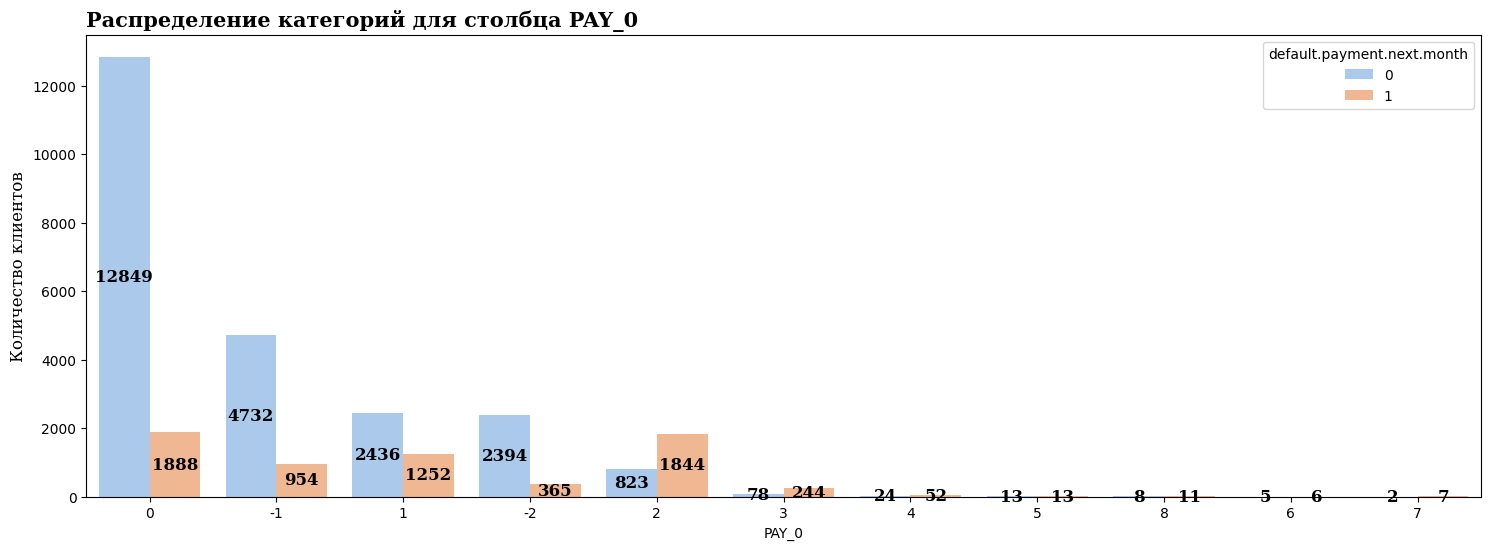

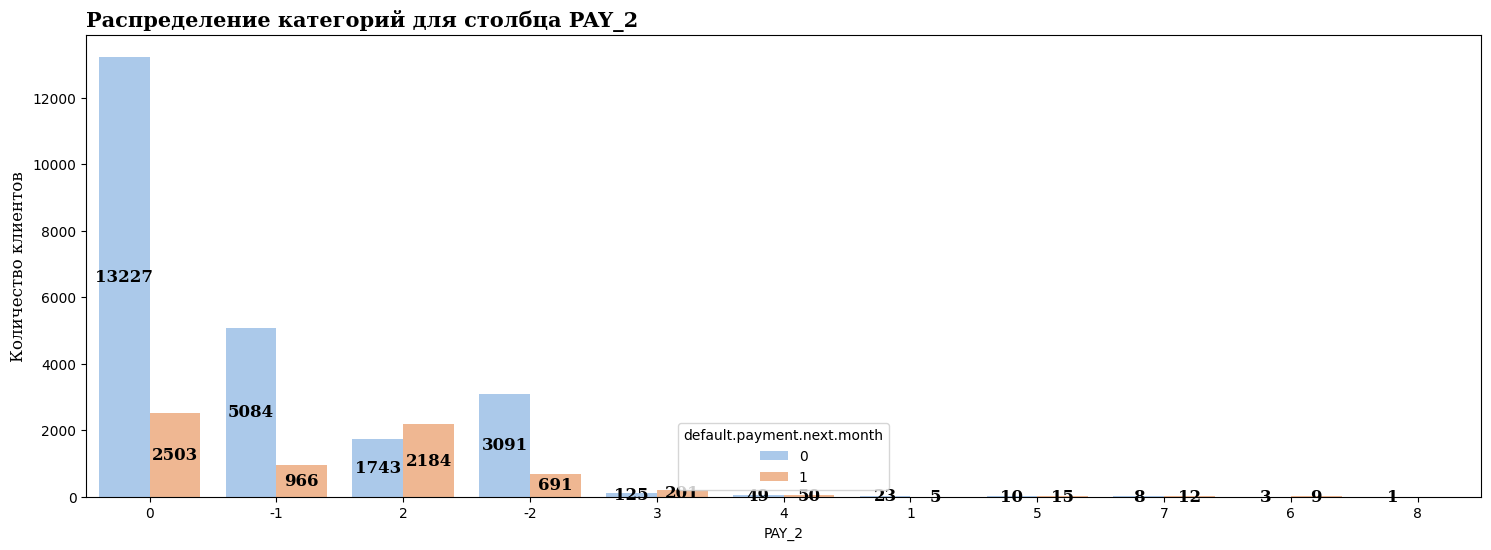

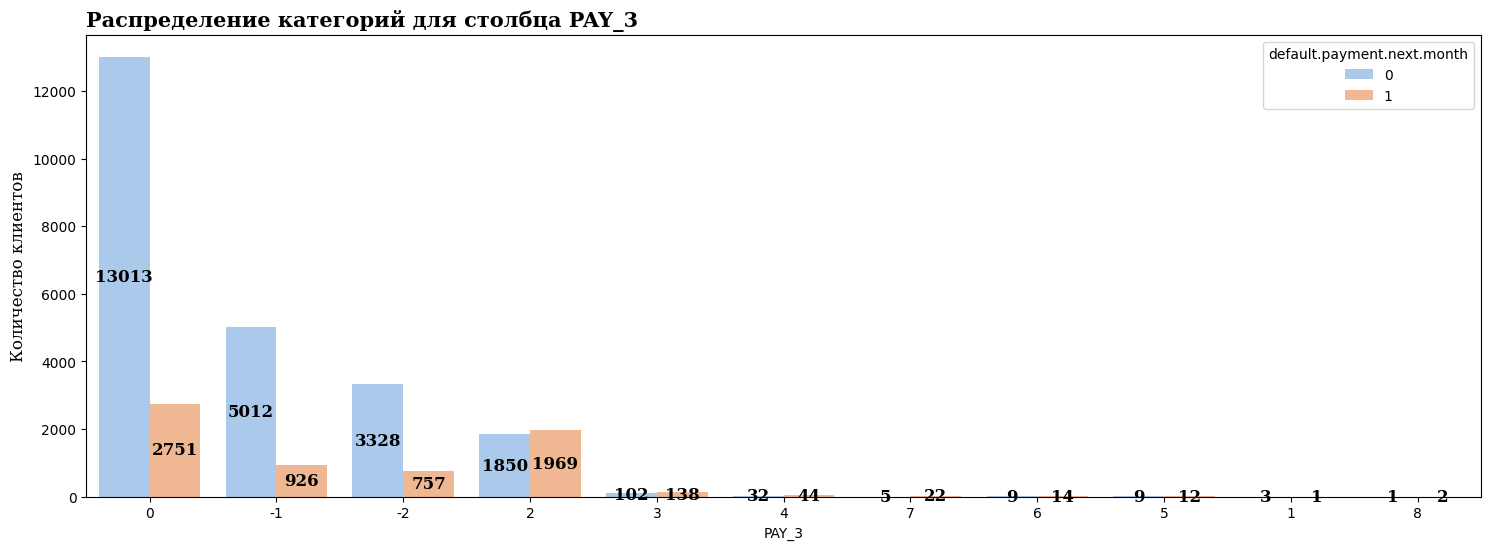

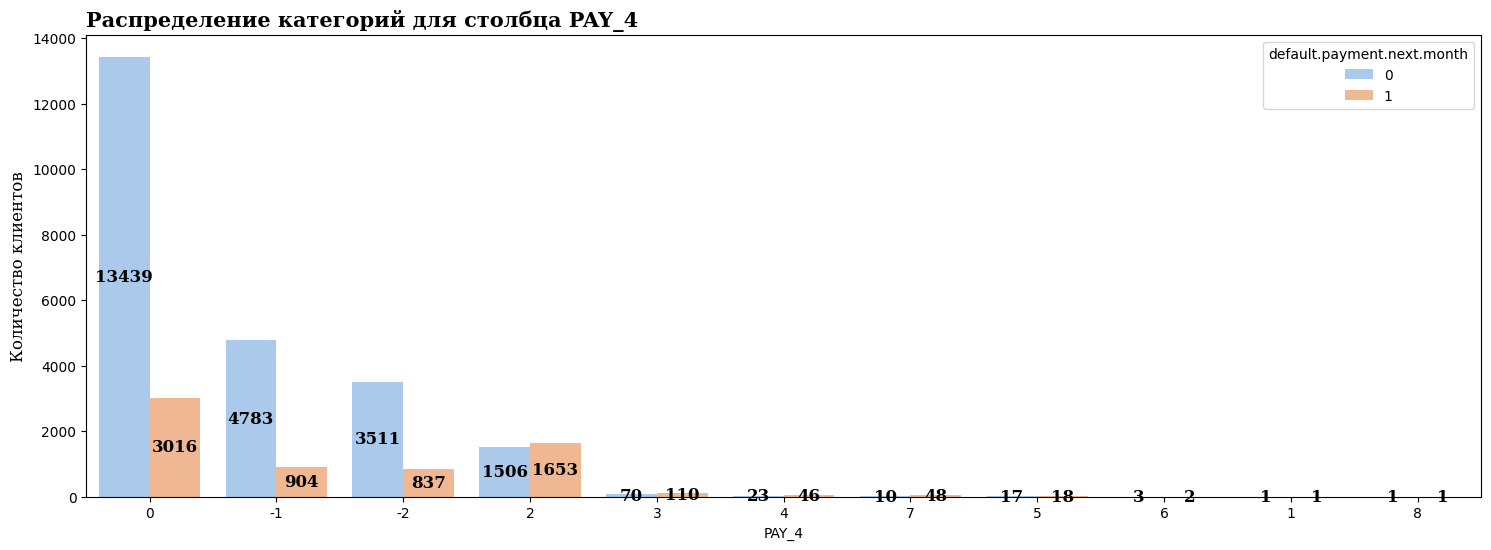

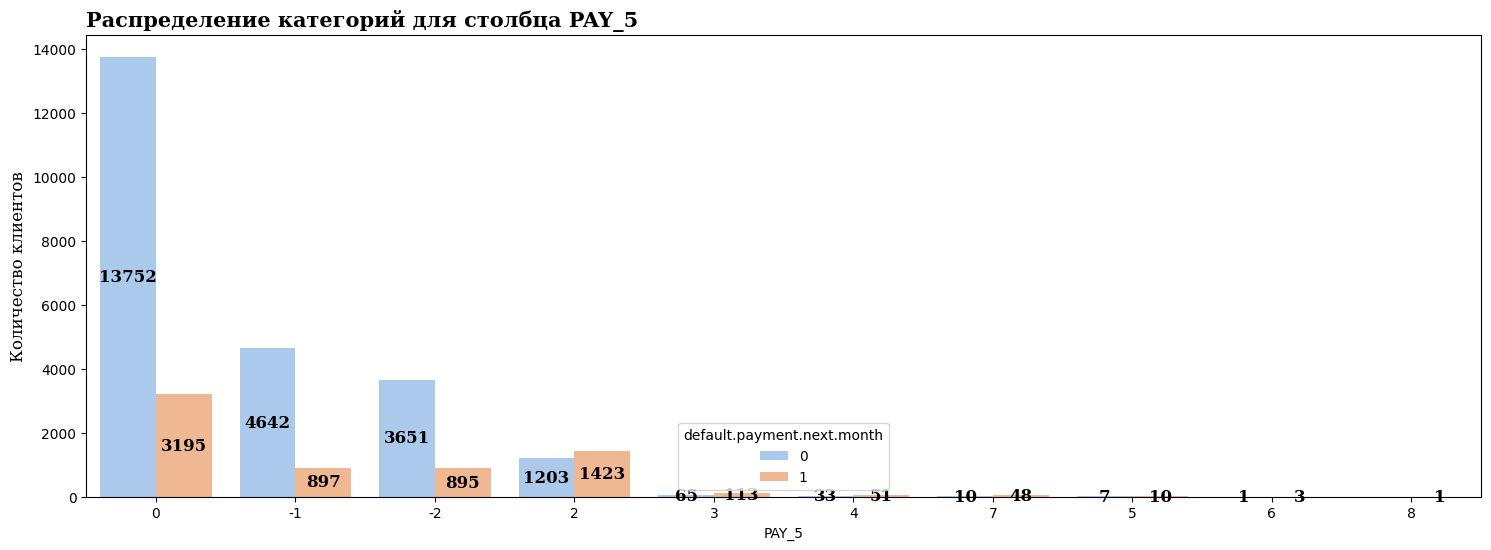

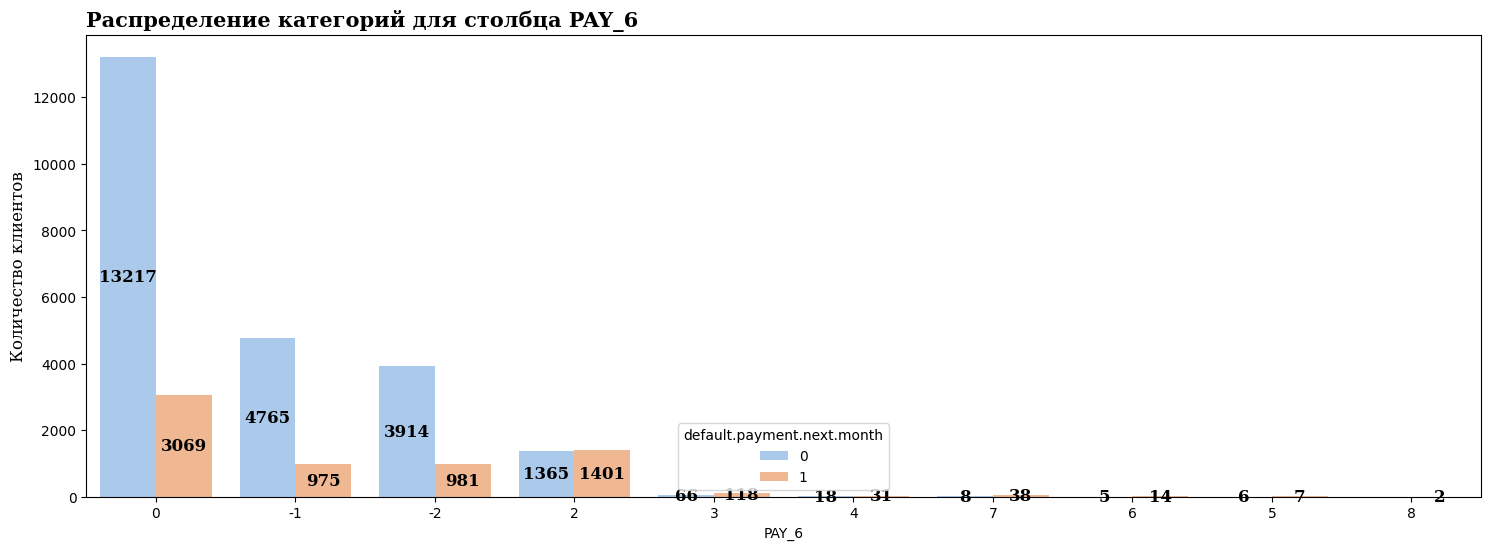

In [14]:
palette = sns.color_palette('pastel')

# визуализируем распределение признаков
for i in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    plt.figure(figsize = (18, 6))
    ax = sns.countplot(x=df[i], order = df[i].value_counts().index, palette=palette, hue=df['default.payment.next.month'])
    plt.title(f'Распределение категорий для столбца {i}', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
    plt.ylabel('Количество клиентов', fontsize=12, fontfamily='serif')
    plt.bar_label(container=ax.containers[0], fontsize=12, 
                  fontweight='bold', fontfamily='serif', label_type='center')
    plt.bar_label(container=ax.containers[1], fontsize=12, 
                  fontweight='bold', fontfamily='serif', label_type='center')
    plt.show()

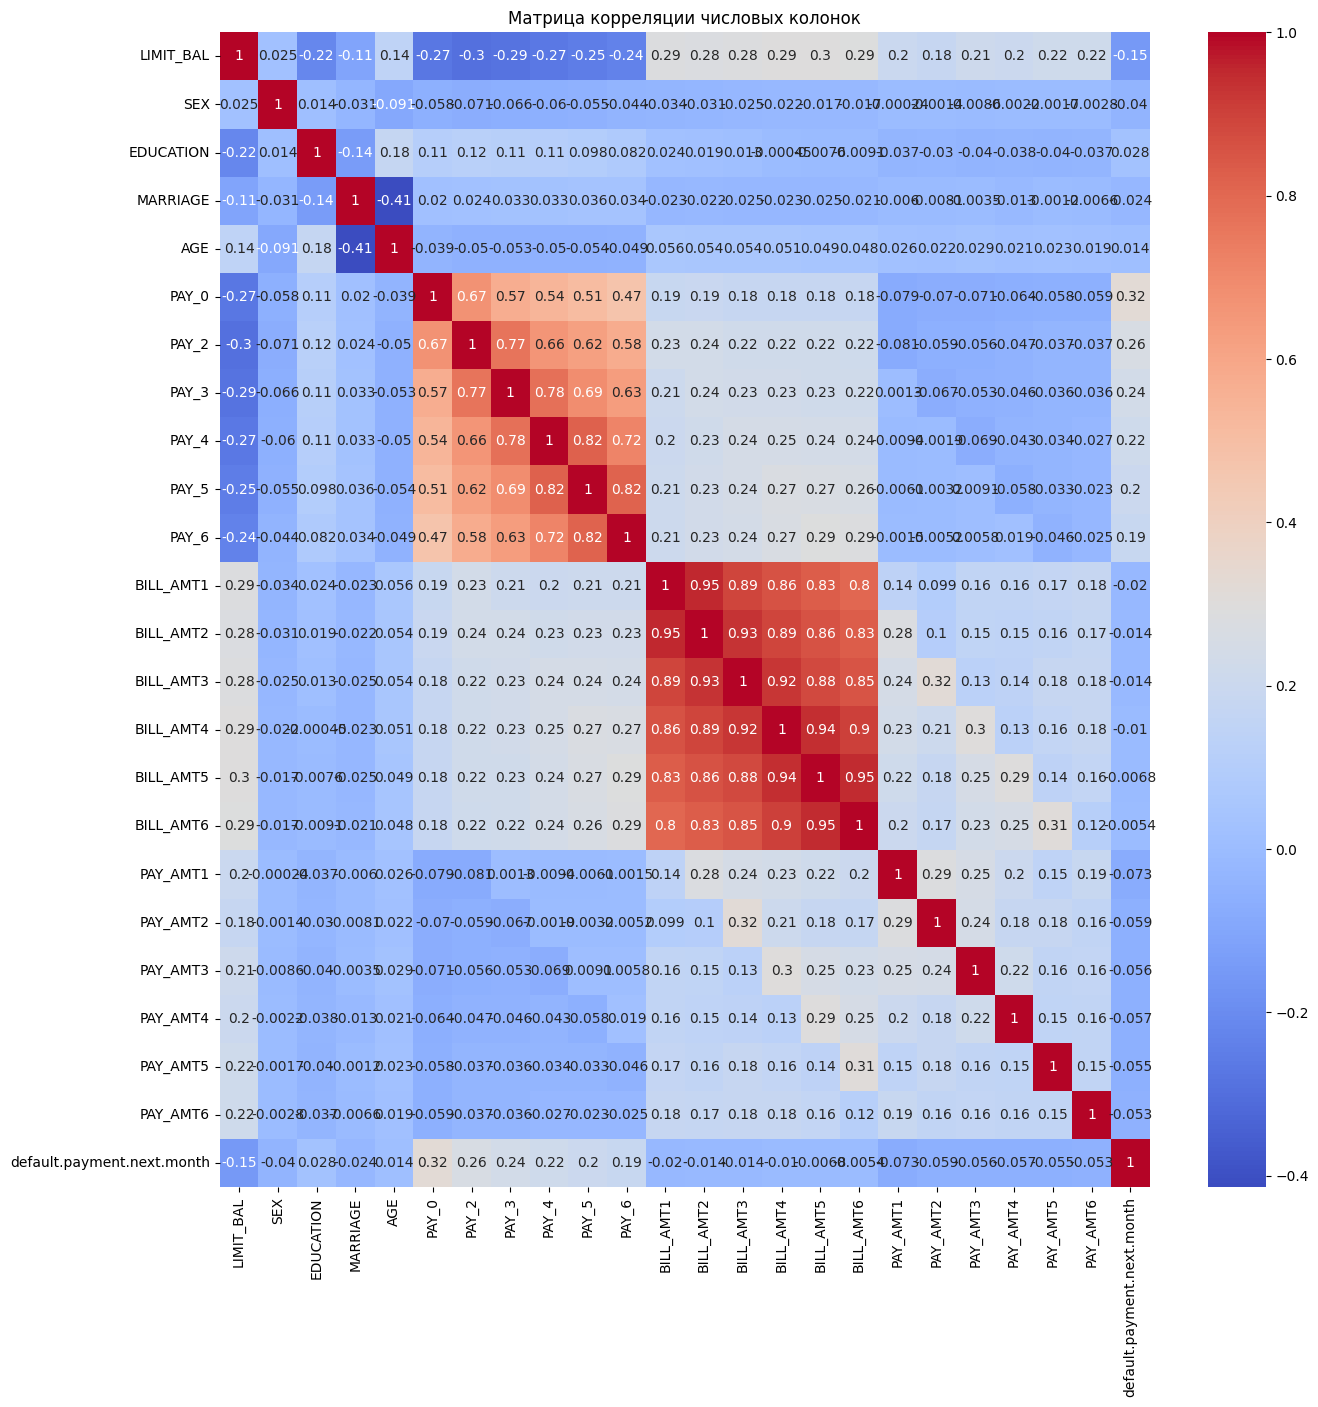

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# отображаем график
plt.show()

In [16]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки LIMIT_BAL: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
Уникальные элементы колонки SEX: [2 1]
Уникальные элементы колонки EDUCATION: [2 1 3 5 4 6 0]
Уникальные элементы колонки MARRIAGE: [1 2 3 0]
Уникальные элементы колонки AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40

In [17]:
df.groupby('EDUCATION').size()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
dtype: int64

In [18]:
X = df.drop(['default.payment.next.month'], axis = 1)
y = df['default.payment.next.month']

In [19]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=0.8)

In [21]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28679,200000.0,2,2,1,28,0,0,0,0,0,...,102712.0,79902.0,59253.0,59826.0,4449.0,3555.0,3524.0,2300.0,2000.0,1800.0
6249,40000.0,1,2,1,36,0,0,2,2,2,...,37089.0,39464.0,38698.0,40051.0,3700.0,0.0,3000.0,0.0,2000.0,800.0
27639,50000.0,2,2,2,23,-1,0,0,2,2,...,3991.0,3748.0,3748.0,-3148.0,1202.0,2300.0,0.0,0.0,4999.0,0.0
14482,30000.0,1,2,2,33,0,0,0,0,0,...,29997.0,30067.0,26709.0,13836.0,1590.0,1469.0,929.0,1265.0,886.0,66.0
18037,20000.0,1,2,1,42,0,0,0,0,0,...,16483.0,18391.0,18783.0,19176.0,1249.0,1600.0,2500.0,1000.0,696.0,862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19623,250000.0,2,2,1,37,0,0,0,0,0,...,221963.0,224949.0,229577.0,234221.0,8000.0,9510.0,8160.0,8364.0,8493.0,8625.0
12752,170000.0,2,3,1,42,-1,-1,-1,-1,-1,...,552.0,552.0,552.0,0.0,552.0,552.0,552.0,552.0,0.0,33290.0
27803,180000.0,2,1,2,26,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24803,260000.0,1,2,1,31,-1,2,-1,-1,-1,...,1350.0,4645.0,4625.0,12209.0,0.0,1350.0,4645.0,4625.0,12209.0,4365.0


In [22]:
from pycaret.classification import *
setup(X_train,target=y_train,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,default.payment.next.month
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(19200, 24)"
6,Transformed test set shape,"(4800, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [23]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8208,0.7840,0.3596,0.6797,0.4698,0.3743,0.4019,1.2830
catboost,CatBoost Classifier,0.8203,0.7848,0.3690,0.6707,0.4755,0.3781,0.4029,4.5780
lightgbm,Light Gradient Boosting Machine,0.8186,0.7811,0.3593,0.6678,0.4667,0.3692,0.3952,0.4310
ada,Ada Boost Classifier,0.8175,0.7765,0.3252,0.6835,0.4404,0.3476,0.3819,0.4330
rf,Random Forest Classifier,0.8155,0.7656,0.3647,0.6478,0.4662,0.3651,0.3874,0.9260
xgboost,Extreme Gradient Boosting,0.8141,0.7670,0.3624,0.6414,0.4625,0.3607,0.3824,0.9710
et,Extra Trees Classifier,0.8123,0.7584,0.3685,0.6300,0.4646,0.3602,0.3794,0.5650
lda,Linear Discriminant Analysis,0.8099,0.7143,0.2484,0.6973,0.3658,0.2828,0.3353,0.1960
ridge,Ridge Classifier,0.7972,0.0000,0.1368,0.7160,0.2292,0.1708,0.2501,0.1900
lr,Logistic Regression,0.7788,0.6493,0.0000,0.0000,0.0000,0.0000,0.0000,1.0060


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### одними из лучших моделей на кросс-валидации по метрике roc auc оказались catboost и gbc . Однако в конечном итоге мы брали TDC для простой интепретации результатов

In [24]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
clf_list = [KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), DecisionTreeClassifier()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1, scoring = 'roc_auc')
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.60603381, 0.60080859, 0.61295606, 0.60242632, 0.60675278]),
 array([0.77255923, 0.75999835, 0.76091503, 0.75268404, 0.77260265]),
 array([0.78874041, 0.77668779, 0.77669623, 0.76970197, 0.78882455]),
 array([0.77398975, 0.75135726, 0.75631701, 0.74390769, 0.76080041]),
 array([0.61151089, 0.61067431, 0.61538543, 0.59644119, 0.62204365])]

In [25]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=5, p=2,\n weights='uniform')","RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n criterion='gini', max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='log_loss', max_depth=3,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_iter_no_change=None,\n random_state=None, subsample=1.0, tol=0.0001,\n validation_fraction=0.1, verbose=0,\n warm_start=False)","ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,\n criterion='gini', max_depth=None, max_features='sqrt',\n max_leaf_nodes=None, max_samples=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=None, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=None, splitter='best')"
0,0.606034,0.772559,0.788740,0.773990,0.611511
1,0.600809,0.759998,0.776688,0.751357,0.610674
2,0.612956,0.760915,0.776696,0.756317,0.615385
3,0.602426,0.752684,0.769702,0.743908,0.596441
4,0.606753,0.772603,0.788825,0.760800,0.622044


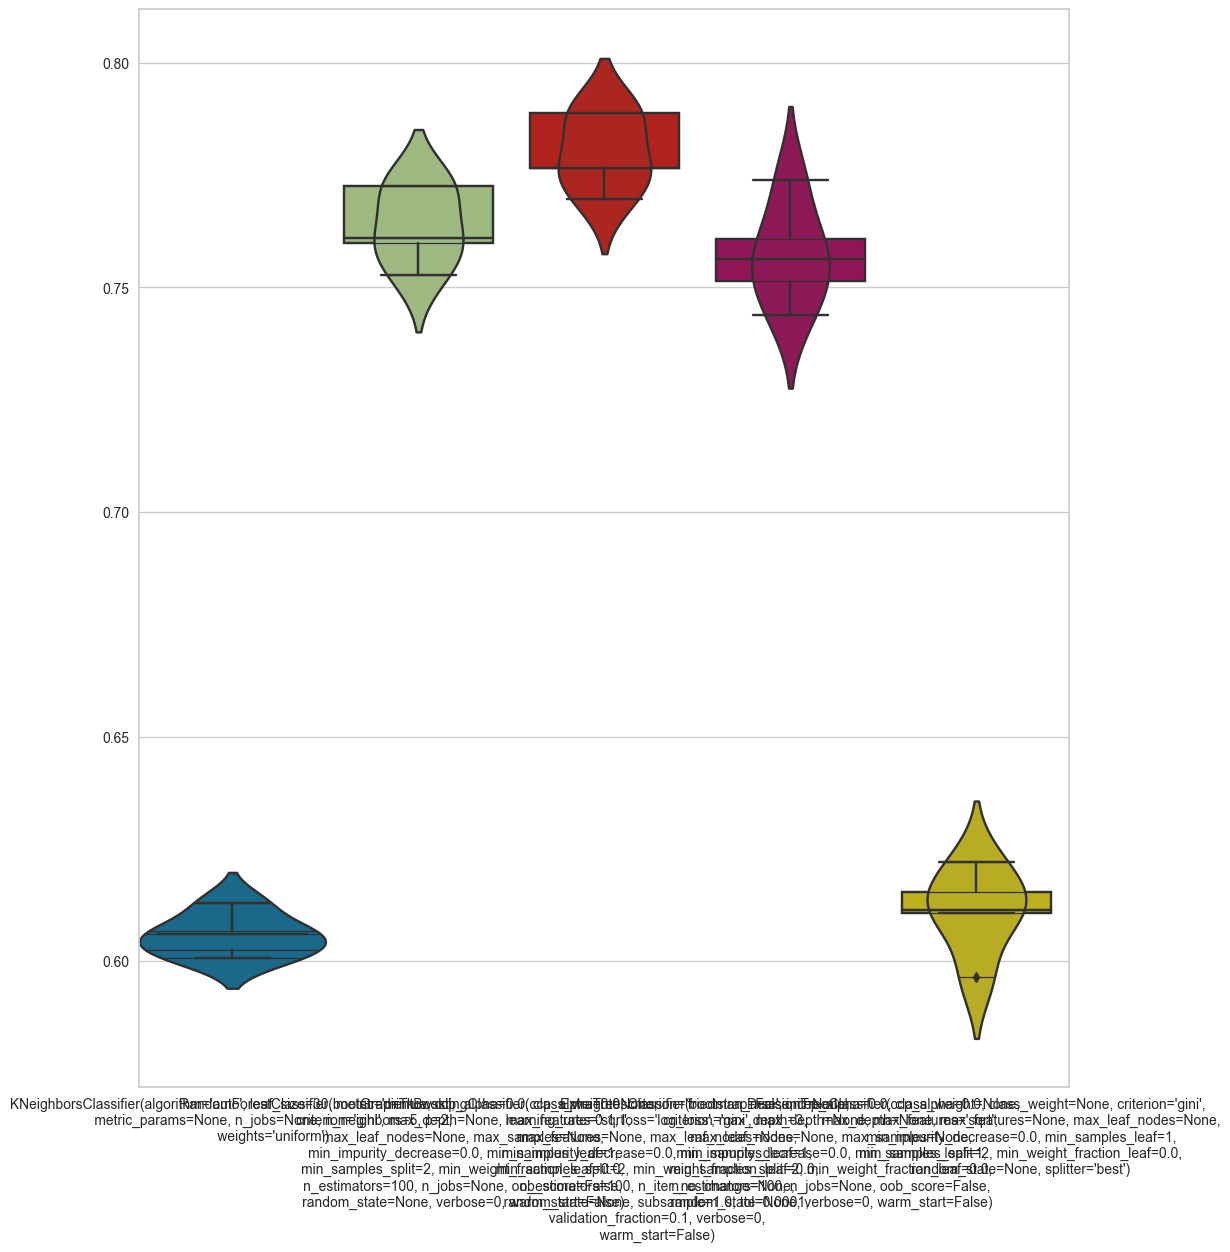

In [26]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [27]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
clf_list = [SVC(), LogisticRegression(), RidgeClassifier(), LinearDiscriminantAnalysis()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1, scoring = 'roc_auc')
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.58917329, 0.50746708, 0.57038972, 0.56310967, 0.53446585]),
 array([0.65631211, 0.6562193 , 0.6610507 , 0.63653408, 0.65140779]),
 array([0.72475214, 0.7103851 , 0.71773379, 0.69858651, 0.712406  ]),
 array([0.72475038, 0.7103851 , 0.71773177, 0.69858601, 0.71240399])]

In [28]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = ['SVC','LogisticRegression', 'RidgeClassifier','LinearDiscriminantAnalysis'] 
#                  [str(i) for i in clf_list]
cv_df

,SVC,LogisticRegression,RidgeClassifier,LinearDiscriminantAnalysis
0,0.589173,0.656312,0.724752,0.724750
1,0.507467,0.656219,0.710385,0.710385
2,0.570390,0.661051,0.717734,0.717732
3,0.563110,0.636534,0.698587,0.698586
4,0.534466,0.651408,0.712406,0.712404


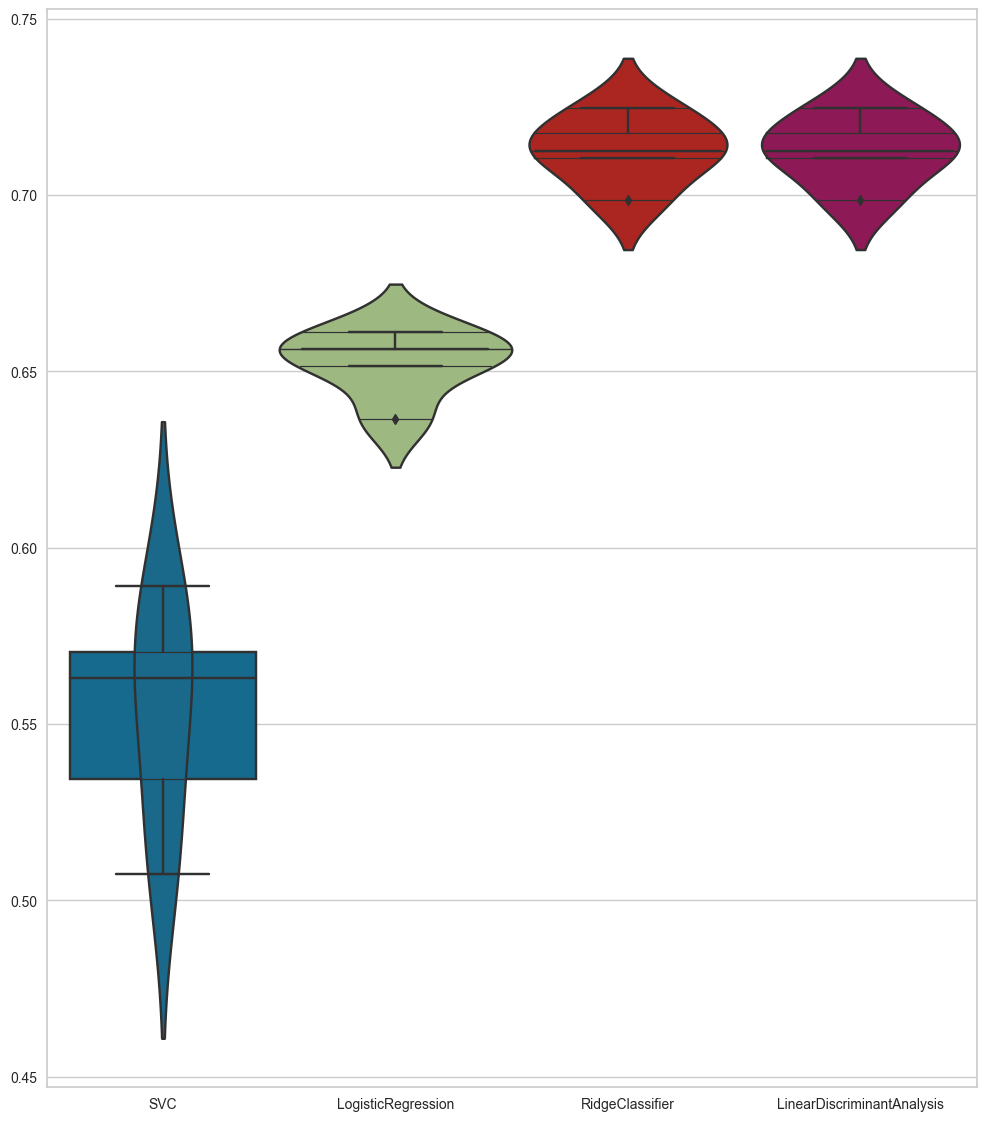

In [29]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

### Попробуем CatBoost

In [30]:
from catboost import CatBoostClassifier
# model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42)
# model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)


pipeline = Pipeline([
    ('classifier', CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=11, random_seed=42))
])

pipeline.fit(X_train,y_train)
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))




# pipeline.score(X_train,y_train)
# print(pipeline.score(X_train,y_train))
# y_pred = pipeline.predict(X_test)
# print(mean_absolute_error(y_test, y_pred))
# print(pipeline.score(X_test, y_test))

0:	learn: 0.6869772	total: 229ms	remaining: 3m 48s
1:	learn: 0.6811902	total: 312ms	remaining: 2m 35s
2:	learn: 0.6753449	total: 403ms	remaining: 2m 14s
3:	learn: 0.6694237	total: 507ms	remaining: 2m 6s
4:	learn: 0.6639093	total: 622ms	remaining: 2m 3s
5:	learn: 0.6581805	total: 724ms	remaining: 1m 59s
6:	learn: 0.6530300	total: 821ms	remaining: 1m 56s
7:	learn: 0.6477580	total: 919ms	remaining: 1m 53s
8:	learn: 0.6425571	total: 1.02s	remaining: 1m 52s
9:	learn: 0.6376324	total: 1.12s	remaining: 1m 50s
10:	learn: 0.6327316	total: 1.21s	remaining: 1m 49s
11:	learn: 0.6279520	total: 1.31s	remaining: 1m 48s
12:	learn: 0.6232817	total: 1.4s	remaining: 1m 46s
13:	learn: 0.6186286	total: 1.5s	remaining: 1m 45s
14:	learn: 0.6139821	total: 1.6s	remaining: 1m 45s
15:	learn: 0.6097990	total: 1.7s	remaining: 1m 44s
16:	learn: 0.6056678	total: 1.81s	remaining: 1m 44s
17:	learn: 0.6015355	total: 1.91s	remaining: 1m 44s
18:	learn: 0.5977067	total: 1.92s	remaining: 1m 39s
19:	learn: 0.5937095	total: 

160:	learn: 0.4114582	total: 14.3s	remaining: 1m 14s
161:	learn: 0.4110041	total: 14.4s	remaining: 1m 14s
162:	learn: 0.4105242	total: 14.5s	remaining: 1m 14s
163:	learn: 0.4100220	total: 14.6s	remaining: 1m 14s
164:	learn: 0.4096463	total: 14.7s	remaining: 1m 14s
165:	learn: 0.4092157	total: 14.8s	remaining: 1m 14s
166:	learn: 0.4088496	total: 14.9s	remaining: 1m 14s
167:	learn: 0.4087267	total: 14.9s	remaining: 1m 13s
168:	learn: 0.4083639	total: 14.9s	remaining: 1m 13s
169:	learn: 0.4079334	total: 15s	remaining: 1m 13s
170:	learn: 0.4076261	total: 15.1s	remaining: 1m 13s
171:	learn: 0.4071959	total: 15.2s	remaining: 1m 13s
172:	learn: 0.4067673	total: 15.3s	remaining: 1m 13s
173:	learn: 0.4065308	total: 15.4s	remaining: 1m 13s
174:	learn: 0.4061721	total: 15.5s	remaining: 1m 12s
175:	learn: 0.4059248	total: 15.6s	remaining: 1m 12s
176:	learn: 0.4056077	total: 15.7s	remaining: 1m 12s
177:	learn: 0.4052865	total: 15.7s	remaining: 1m 12s
178:	learn: 0.4049609	total: 15.8s	remaining: 1m

319:	learn: 0.3753136	total: 29.2s	remaining: 1m 1s
320:	learn: 0.3751484	total: 29.2s	remaining: 1m 1s
321:	learn: 0.3750019	total: 29.3s	remaining: 1m 1s
322:	learn: 0.3748204	total: 29.4s	remaining: 1m 1s
323:	learn: 0.3746246	total: 29.5s	remaining: 1m 1s
324:	learn: 0.3745289	total: 29.6s	remaining: 1m 1s
325:	learn: 0.3743753	total: 29.7s	remaining: 1m 1s
326:	learn: 0.3741140	total: 29.8s	remaining: 1m 1s
327:	learn: 0.3739484	total: 29.9s	remaining: 1m 1s
328:	learn: 0.3738216	total: 30s	remaining: 1m 1s
329:	learn: 0.3736730	total: 30.1s	remaining: 1m 1s
330:	learn: 0.3734083	total: 30.1s	remaining: 1m
331:	learn: 0.3732357	total: 30.2s	remaining: 1m
332:	learn: 0.3731054	total: 30.3s	remaining: 1m
333:	learn: 0.3729628	total: 30.4s	remaining: 1m
334:	learn: 0.3728345	total: 30.5s	remaining: 1m
335:	learn: 0.3727195	total: 30.6s	remaining: 1m
336:	learn: 0.3725283	total: 30.6s	remaining: 1m
337:	learn: 0.3722733	total: 30.7s	remaining: 1m
338:	learn: 0.3721500	total: 30.8s	rem

479:	learn: 0.3548246	total: 44.1s	remaining: 47.8s
480:	learn: 0.3547125	total: 44.2s	remaining: 47.7s
481:	learn: 0.3546175	total: 44.4s	remaining: 47.7s
482:	learn: 0.3545198	total: 44.5s	remaining: 47.6s
483:	learn: 0.3544649	total: 44.6s	remaining: 47.5s
484:	learn: 0.3543355	total: 44.7s	remaining: 47.4s
485:	learn: 0.3542589	total: 44.8s	remaining: 47.3s
486:	learn: 0.3541442	total: 44.9s	remaining: 47.2s
487:	learn: 0.3539694	total: 45s	remaining: 47.2s
488:	learn: 0.3539057	total: 45.1s	remaining: 47.1s
489:	learn: 0.3538418	total: 45.1s	remaining: 47s
490:	learn: 0.3536933	total: 45.2s	remaining: 46.9s
491:	learn: 0.3535053	total: 45.3s	remaining: 46.8s
492:	learn: 0.3534596	total: 45.4s	remaining: 46.7s
493:	learn: 0.3532715	total: 45.5s	remaining: 46.6s
494:	learn: 0.3531447	total: 45.7s	remaining: 46.6s
495:	learn: 0.3529297	total: 45.8s	remaining: 46.5s
496:	learn: 0.3528596	total: 45.9s	remaining: 46.4s
497:	learn: 0.3527618	total: 46s	remaining: 46.4s
498:	learn: 0.3525

639:	learn: 0.3362960	total: 59.5s	remaining: 33.5s
640:	learn: 0.3362119	total: 59.6s	remaining: 33.4s
641:	learn: 0.3361044	total: 59.7s	remaining: 33.3s
642:	learn: 0.3360623	total: 59.8s	remaining: 33.2s
643:	learn: 0.3359780	total: 59.9s	remaining: 33.1s
644:	learn: 0.3358857	total: 59.9s	remaining: 33s
645:	learn: 0.3357491	total: 1m	remaining: 32.9s
646:	learn: 0.3356605	total: 1m	remaining: 32.8s
647:	learn: 0.3355860	total: 1m	remaining: 32.7s
648:	learn: 0.3354440	total: 1m	remaining: 32.6s
649:	learn: 0.3353399	total: 1m	remaining: 32.5s
650:	learn: 0.3352991	total: 1m	remaining: 32.4s
651:	learn: 0.3350547	total: 1m	remaining: 32.3s
652:	learn: 0.3350097	total: 1m	remaining: 32.2s
653:	learn: 0.3348900	total: 1m	remaining: 32.1s
654:	learn: 0.3347917	total: 1m	remaining: 32s
655:	learn: 0.3347101	total: 1m	remaining: 31.9s
656:	learn: 0.3346410	total: 1m	remaining: 31.8s
657:	learn: 0.3345314	total: 1m 1s	remaining: 31.7s
658:	learn: 0.3343877	total: 1m 1s	remaining: 31.6s


800:	learn: 0.3206414	total: 1m 13s	remaining: 18.3s
801:	learn: 0.3204650	total: 1m 13s	remaining: 18.3s
802:	learn: 0.3202857	total: 1m 14s	remaining: 18.2s
803:	learn: 0.3200991	total: 1m 14s	remaining: 18.1s
804:	learn: 0.3200022	total: 1m 14s	remaining: 18s
805:	learn: 0.3199444	total: 1m 14s	remaining: 17.9s
806:	learn: 0.3198794	total: 1m 14s	remaining: 17.8s
807:	learn: 0.3197526	total: 1m 14s	remaining: 17.7s
808:	learn: 0.3196040	total: 1m 14s	remaining: 17.6s
809:	learn: 0.3194879	total: 1m 14s	remaining: 17.5s
810:	learn: 0.3193960	total: 1m 14s	remaining: 17.4s
811:	learn: 0.3193533	total: 1m 14s	remaining: 17.3s
812:	learn: 0.3192663	total: 1m 14s	remaining: 17.2s
813:	learn: 0.3191105	total: 1m 14s	remaining: 17.1s
814:	learn: 0.3190307	total: 1m 15s	remaining: 17s
815:	learn: 0.3189527	total: 1m 15s	remaining: 16.9s
816:	learn: 0.3187508	total: 1m 15s	remaining: 16.9s
817:	learn: 0.3186892	total: 1m 15s	remaining: 16.8s
818:	learn: 0.3186241	total: 1m 15s	remaining: 16.

955:	learn: 0.3048620	total: 1m 27s	remaining: 4.05s
956:	learn: 0.3047445	total: 1m 28s	remaining: 3.96s
957:	learn: 0.3046457	total: 1m 28s	remaining: 3.86s
958:	learn: 0.3044658	total: 1m 28s	remaining: 3.77s
959:	learn: 0.3043859	total: 1m 28s	remaining: 3.68s
960:	learn: 0.3043055	total: 1m 28s	remaining: 3.59s
961:	learn: 0.3041395	total: 1m 28s	remaining: 3.5s
962:	learn: 0.3040375	total: 1m 28s	remaining: 3.4s
963:	learn: 0.3039263	total: 1m 28s	remaining: 3.31s
964:	learn: 0.3038403	total: 1m 28s	remaining: 3.22s
965:	learn: 0.3036949	total: 1m 28s	remaining: 3.13s
966:	learn: 0.3035791	total: 1m 29s	remaining: 3.04s
967:	learn: 0.3034391	total: 1m 29s	remaining: 2.95s
968:	learn: 0.3033594	total: 1m 29s	remaining: 2.86s
969:	learn: 0.3032781	total: 1m 29s	remaining: 2.76s
970:	learn: 0.3031842	total: 1m 29s	remaining: 2.67s
971:	learn: 0.3031032	total: 1m 29s	remaining: 2.58s
972:	learn: 0.3029935	total: 1m 29s	remaining: 2.49s
973:	learn: 0.3029202	total: 1m 29s	remaining: 2

ROC AUC SCORE на трейне оказался 0.92, на тесте оказался 0.77. Что говорит о том, что наша модель переобучилась (скорее нужно указать меньше глубину depth)

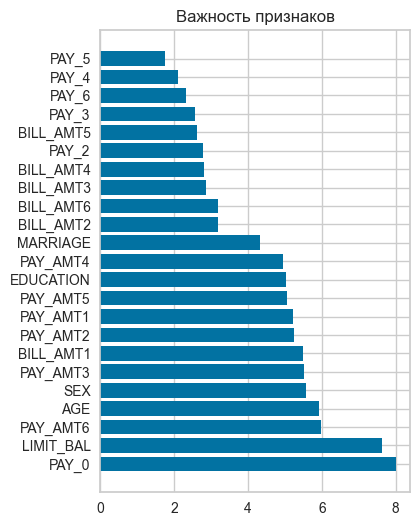

In [31]:
importance = np.sort(pipeline['classifier'].feature_importances_)
importance_name = np.argsort(pipeline['classifier'].feature_importances_)
feature_names = df.columns

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

Как видим на catboost все признаки имеют важность. В Catboost не нужно преобразовывать переменные, потому что он и так все это делает. Как видим наибольшую важность имеет признак PAY_0 (статус погашения) и LIMIT_BAL (сумма кредита)

### Создадим ColumnTransformer для наших данных (для исп. в TreeDecisionClassifier)

#### Применим OneHotEncoder для переменных Education, marriage, sex. Для остальных колонок применим MinMaxScaler чтобы трансформировать их в диапазон от 0 до 1. 

In [32]:
categorical_features = ['EDUCATION','MARRIAGE']


imputer_for_categorical_OHE = Pipeline(steps=[
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
    
])


CT = ColumnTransformer([
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
             ],  remainder = MinMaxScaler())

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(n_jobs=None,
                  remainder=MinMaxScaler(clip=False, copy=True,
                                         feature_range=(0, 1)),
                  sparse_threshold=0.3, transformer_weights=None,
                  transformers=[('imputer_for_categorical_OHE',
                                 Pipeline(memory=None,
                                          steps=[('scaler',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse='deprecated',
                                                                sparse_output=True))],
                                          verbose=False),
                                 ['EDUCATION', 'MARRIAGE'])],
                  verbose=False, verbose_feature_names_out=True)

Код ниже для удобного отображения

In [33]:
X_train_new = pd.DataFrame(res_ct, columns=CT.get_feature_names_out())


display(X_train_new.T)

X_test_new = pd.DataFrame(CT.transform(X_test), columns=CT.get_feature_names_out())


display(X_test_new.T)

,0,1,2,3,4,5,6,7,8,9,...,23990,23991,23992,23993,23994,23995,23996,23997,23998,23999
imputer_for_categorical_OHE__EDUCATION_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
imputer_for_categorical_OHE__EDUCATION_2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__MARRIAGE_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__MARRIAGE_1,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
imputer_for_categorical_OHE__MARRIAGE_2,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
imputer_for_categorical_OHE__EDUCATION_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_1,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_2,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
imputer_for_categorical_OHE__EDUCATION_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__EDUCATION_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__MARRIAGE_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__MARRIAGE_1,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__MARRIAGE_2,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


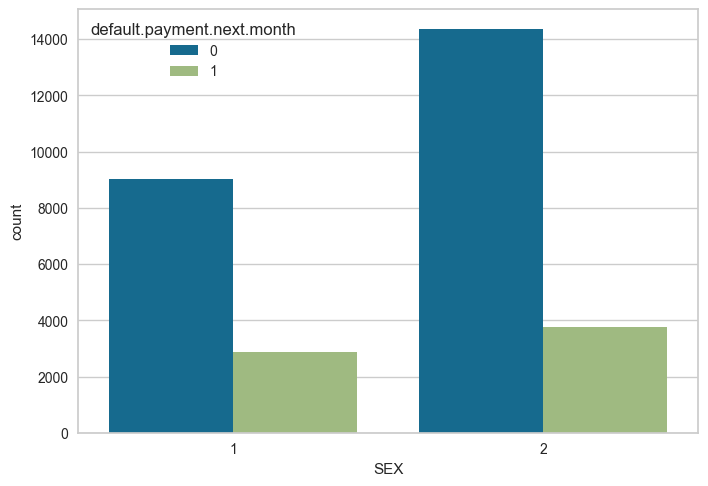

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="SEX", hue="default.payment.next.month", data=df)
plt.show()

In [36]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', DecisionTreeClassifier())])

criterion = ['gini']
min_samples_leaf = np.arange(1,5,1)
max_features = np.arange(0.01,1,0.1)
max_depth = [1,2,3,4,5,6,7]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [DecisionTreeClassifier()],
     'classifier__criterion': criterion,
     'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__max_features': max_features,
      'classifier__max_depth': max_depth
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder=MinMaxScaler(clip=False,
                                                                                 copy=True,
                                                                                 feature_range=(0,
                                                                                                1)),
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_categorical_OHE',
                                                                         Pipeline(memory=No...
                                                                                      steps=[('scaler',
                                                                                              OneHotEncoder(categories='auto',
                                                                                                            drop=None,
                                                                                                            dtype=<class 'numpy.float64'>,
                                                                                                            handle_unknown='ignore',
                                                                                                            max_categories=None,
                                                                                                            min_frequency=None,
                                                                                                            sparse='deprecated',
                                                                                                            sparse_output=True))],
                                                                                      verbose=False),
                                                                             ['EDUCATION',
                                                                              'MARRIAGE'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__max_depth'>

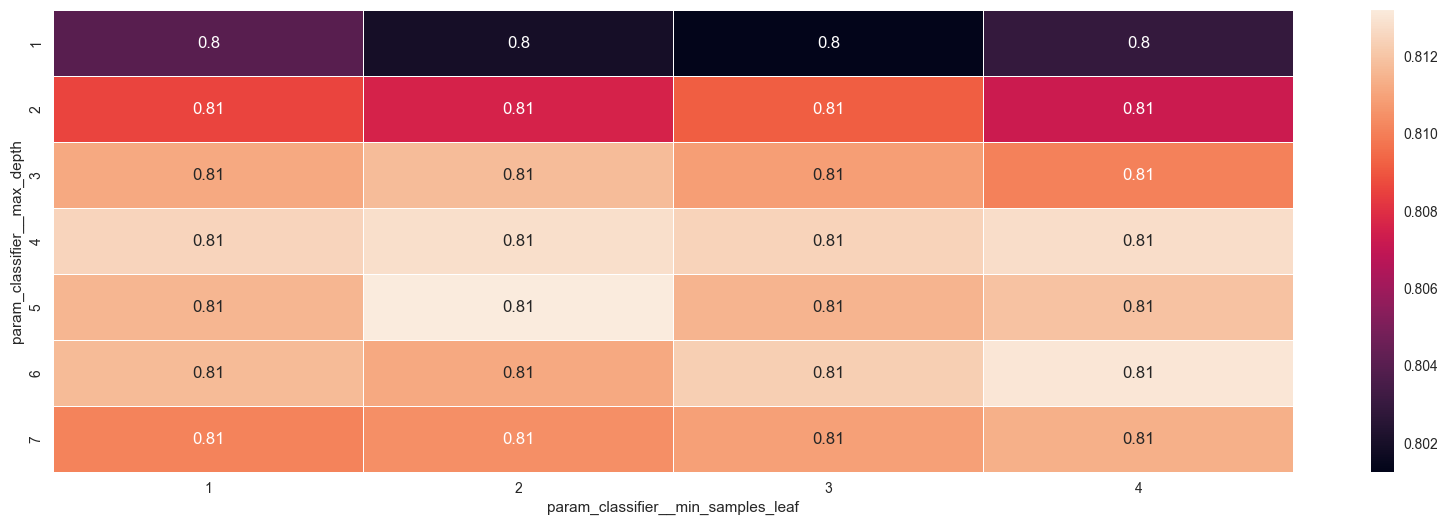

In [37]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__max_depth',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [38]:
from sklearn.tree import DecisionTreeClassifier


pipeline = Pipeline([('preprocessing', CT),
    ('classifier', DecisionTreeClassifier(max_depth = 4,  min_samples_leaf = 2, criterion= 'gini'))
])

pipeline.fit(X_train,y_train)
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))

0.7473344415340606
0.7480565050779131


Здесь мы получили качество метрики чуть ниже, на трейне 0.747, на тесте 0.748. Однако, можно с уверенностью сказать, что данная модель более устойчивая и не переобученная (так как дельта между трейн и тест очень низкая)

Визуализируем наше дерево

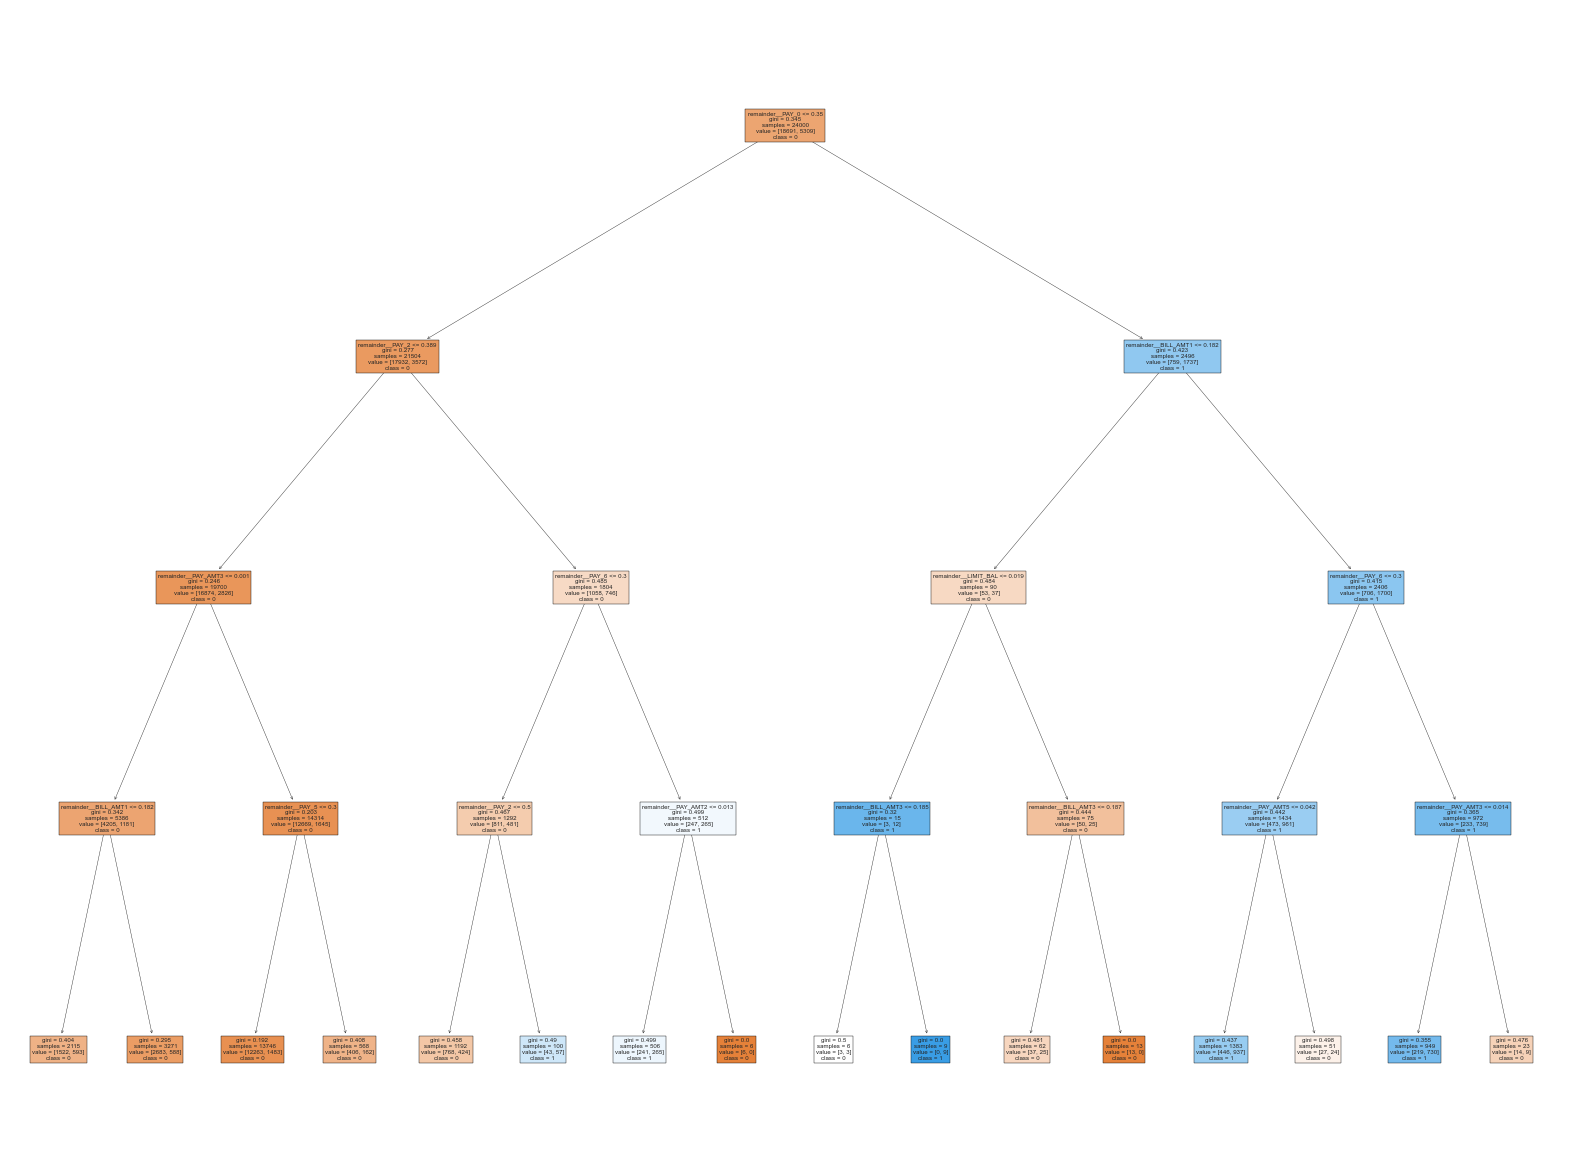

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(pipeline.named_steps['classifier'], feature_names=X_train_new.columns, class_names=['0', '1'], filled=True)
plt.show()

Модель дерева решений может быть склонна к переобучению в следующих случаях:

1.Если глубина дерева слишком большая, то модель может начать "запоминать" закономерности в данных из обучающей выборки, вместо обобщения, что приводит к переобучению. В таком случае, необходимо ограничить глубину дерева с помощью гиперпараметра `max_depth`.

2.Если в листьях дерева оказывается слишком мало образцов (строчек), то модель может начать "запоминать" шум в данных, вместо того чтобы обобщать информацию. Чтобы предотвратить это, можно увеличить минимальное количество образцов в листьях с помощью гиперпараметра `min_samples_leaf`.

3.Если в задаче большое количество признаков, то некоторые из них могут неинформативными или иметь большую корреляцию с другими признаками, чтобы этого избежать мы можем использовать случайное подмножество признаков используемых при обучении модели деревьев. Для этого можно изменять гиперпараметр `max_features` (от 0 до 1), или от 1 до N-количества признаков в датасете.

4.Еще есть параметр, который может снизить риск переобучения - это `max_leaf_nodes` - это максимальное количество листьев дерева. Если значение `max_leaf_nodes` задано, то дерево будет расти до тех пор, пока не будет достигнуто это количество листьев, даже если это означает, что некоторые узлы не будут разделены.


Таким образом. 

Если модель слишком чувствительна к шуму в данных, то она может начать "запоминать" этот шум. Это может произойти, если в данных есть выбросы, ошибки или пропуски. В таком случае, необходимо провести предобработку данных, чтобы удалить выбросы или заполнить пропущенные значения.

Если модель обучается на слишком малом количестве данных, то она может начать переобучаться. В таком случае, необходимо собрать больше данных или использовать методы регуляризации, чтобы предотвратить переобучение.

## Критерий информативности или как понять на сколько правильно наши признаки разделяются в дереве?

Значение коэффициента Джини на каждом этапе разделения дерева решений показывает, насколько хорошо признаки разделяют классы в выборке на каждом уровне дерева. Чем ниже значение коэффициента Джини, тем лучше признак разделяет классы и тем лучше он подходит для разбиения данного узла дерева.

В данном конкретном случае, коэффициент Джини был использован в качестве критерия разбиения узлов дерева. В выводе кода, можно увидеть значение коэффициента Джини для каждого разделения дерева, начиная с корневого узла и заканчивая листьями дерева. Например, значение коэффициента Джини для корневого узла равно 0.345, что разбиение было не очень, поэтому опускаясь ниже, мы видим, что значение данного коэффициента постепенно уменьшается, а это значит что разделение становится более явным и правильным.

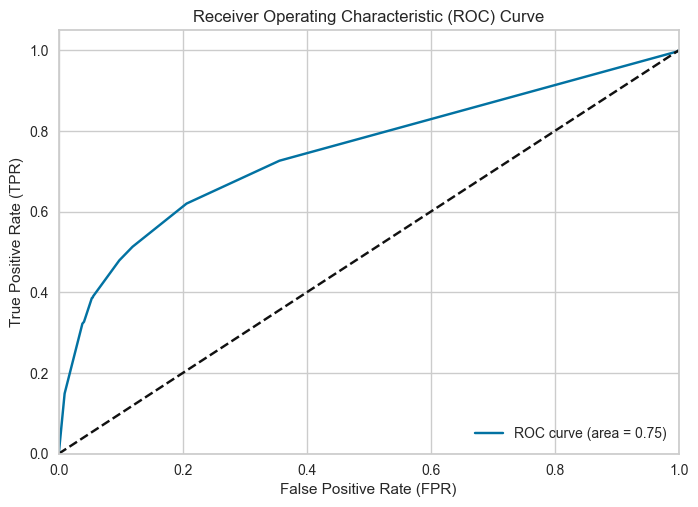

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Получение вероятностей принадлежности к классу 1
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

# Вычисление значений false positive rate (FPR) и true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисление площади под кривой ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Построение графика ROC-AUC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # случайная модель
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

График ROC-кривой отображает зависимость между долей верно классифицированных положительных объектов (true positive rate, TPR) и долей неверно классифицированных отрицательных объектов (false positive rate, FPR) при изменении порога бинаризации вероятностей классов. 

Значение ROC AUC отражает качество бинарной классификации: оно равно площади под ROC-кривой и принимает значения от 0 до 1, где 0.5 соответствует случайному угадыванию, а 1 - идеальной классификации.

Значение 0.74 ROC AUC означает, что модель хорошо разделяет классы, но не идеально. Такое значение может указывать на то, что модель имеет некоторые проблемы с разделением классов, возможно, из-за сильной перекоса в данных или недостаточного количества признаков для предсказания классов. 

Чтобы улучшить качество модели, можно попробовать использовать другие алгоритмы машинного обучения, настройку гиперпараметров, добавление новых признаков или увеличение размера обучающего набора данных. Также можно использовать ROC-кривую для определения оптимального порога бинаризации, который соответствует наилучшему компромиссу между TPR и FPR.

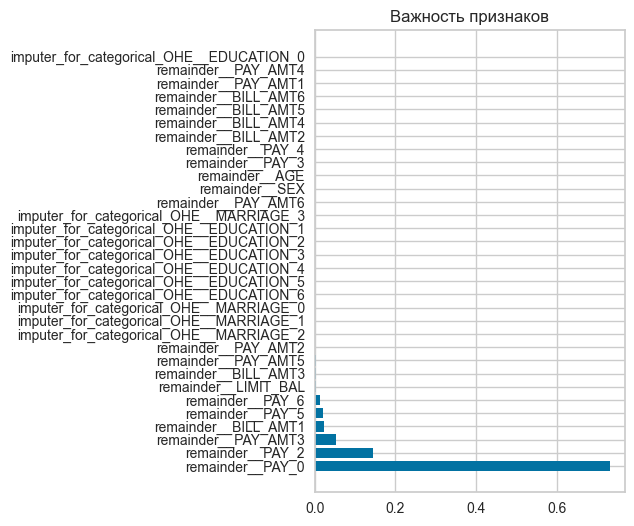

In [41]:
importance = np.sort(pipeline['classifier'].feature_importances_)
importance_name = np.argsort(pipeline['classifier'].feature_importances_)
feature_names = X_train_new.columns

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

Как мы видим один из самых важных признаков оказался PAY_0. Который означал статус погашения кредита в сентябре 2005 г. Также оказались значимыми и другие признаки по статусу погашения кредита (PAY_2, PAY_4 и т.д.).

Однако основная доля признаков, которые мы обработали через OneHotEncoder оказались менее информативными. Это возможно по многим причинам. Как из-за выбранной модели (допустим модель catboost выдавала, что все признаки являются важными), так из-за подбора гиперпараметров, так и из-за разбиения данных, поэтому здесь важно пробовать различные модели, а также пробовать ставить трешолд на пороги значимости, и обучать модель только на тех признаках, которые проходят этот порог. Смотреть на результат, и если он улучшается дальше эксперементировать с фичами. 

Также возможно, такой результат говорит о том, что применять OHE к категориальным переменным не стоит. И лучше оставить их в порядковом виде, возможно их значимость увеличиться (НО ЭТО МЫ ГОВОРИМ ТОЛЬКО ПРО МОДЕЛЬ ДЕРЕВЬЕВ, В ДРУГИХ МОДЕЛЯХ ВСЕ БУДЕТ ПО-ДРУГОМУ)

Получим список предсказанных вероятностей на тестовый кусок

In [42]:
y_pred_proba = pipeline.predict_proba(X_test)[:,1]
y_pred_proba

array([0.3557047 , 0.17976154, 0.17976154, ..., 0.10788593, 0.28037825,
       0.10788593])